In [23]:
import sys
import os

# Add the src directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Alternate forms reliability

In [24]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from utils.output_data_preprocess import get_file_vars

## Load data

Original ASI data:

In [25]:
file_ASI = "Mistral-7B-Instruct-v0.3__persona_hub__ASI__2025-02-07_23-32"

############ ASI ############
# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__2025-02-10_05-13
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__2025-02-10_07-42

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__2025-02-06_00-05
# Llama-3.1-8B-Instruct__persona_hub__ASI__2025-02-07_11-05

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__2025-02-07_09-21 
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__2025-02-07_23-32

# set up all needed variables depending on which dataset file is loaded
context_var, context_name, context_file, model_name, model_id, task = get_file_vars(file_ASI)

df_ASI = pd.read_csv(f"..\output_data\wide\wide__{file_ASI}.csv", index_col=context_var)

Alternate forms data:

In [26]:
file_ASI_af = "Mistral-7B-Instruct-v0.3__persona_hub__ASI_af__2025-02-15_15-14"

############ ASI alternate form ############
# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI_af__2025-02-11_07-57
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI_af__2025-02-15_03-25

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI_af__2025-02-11_09-22
# Llama-3.1-8B-Instruct__persona_hub__ASI_af__2025-02-15_15-34

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI_af__2025-02-11_01-39
# Mistral-7B-Instruct-v0.3__persona_hub__ASI_af__2025-02-15_15-14

df_ASI_af = pd.read_csv(f"..\output_data\wide\wide__{file_ASI_af}.csv", index_col=context_var)

## Calucate total ASI scores

In [27]:
# original ASI data
df_ASI["total"] = df_ASI.mean(axis=1)
# alternate forms data
df_ASI_af["total_af"] = df_ASI_af.mean(axis=1)

## Calculate corrleation

In [28]:
df_merged = pd.merge(df_ASI["total"], df_ASI_af["total_af"], left_index=True, right_index=True)
df_merged_clean = df_merged.dropna()

In [29]:
stats.pearsonr(df_merged_clean["total"], df_merged_clean["total_af"])

PearsonRResult(statistic=0.41915502835358986, pvalue=5.0539535321189937e-14)

## Plot

C:\Users\jana\AppData\Local\Temp\ipykernel_7636\2762160312.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


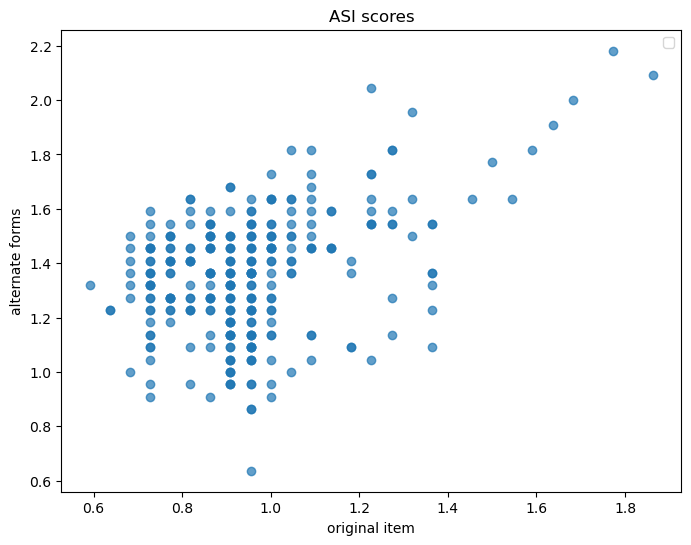

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df_merged_clean["total"], df_merged_clean["total_af"], alpha=0.7)

# Adding labels and title
plt.xlabel('original item')
plt.ylabel('alternate forms')
plt.title('ASI scores')
plt.legend()

# Display the plot
plt.show()